#### Import Dependencies

In [1]:
import random
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Install and import the citipy package. This package will output the nearest city to a specific pair of geographical
# coordinates. It is very important for this project.
import sys
!{sys.executable} -m pip install citipy
from citipy import citipy

#### Save config information.

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "febde43dfe4affe5e81fe677f8e0a7e3"

#### Generate 500 cities for data analysis

In [3]:
# Latitude limits for the analysis are the full -90 degrees and 90 degrees.
# Longitude limits are -180 degrees and 180 degrees.
lat_min = -90
lat_max = 90

long_min = -180
long_max = 180

# Set a counter and create an empty list for holding the city and country
# information
counter = 0
cities = []
countries = []

#Generate pseudo-random latitude and longitude coordinates
while counter < 560:
    lat = random.uniform(lat_min, lat_max)
    long = random.uniform(long_min, long_max)

#Pick the nearest city to those latitude and longitude values
    loc = citipy.nearest_city(lat, long)
    city = loc.city_name
    country = loc.country_code
    if city: 
        if city not in cities:
            cities.append(city)
            countries.append(country)
            counter = counter + 1
        else:
            pass

#### Perform a query to OpenWeatherMap site for each city

In [4]:
# What I want is to run a loop for 500 individual cities, where for each
# city I pull the weather data and then move on to the next city. Unfortunately
# the Citipy database is more extensive than OpenWeatherMap, so I end up with 
# fewer than 500 cities in my weather data if I simply perform 500 queries. To
# to offset and reconcile this, I selected more than 500 cities from the CitiPy
# app and then performed queries on each of them, resulting in CLOSE TO 500 net
# data points.

#The following code is adapted from the exercise Ins_OpenWeatherDataFrame:

In [5]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [6]:
# Set up lists to hold reponse info

city_name = []
lat = []
maxtemp = []
humid = []
cloud = []
wind_spd = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(f"checking {city} (city number {counter}) at url {query_url + city}")
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        counter = counter + 1
    except:
        print("City not found")
        pass

checking pushkar (city number 0) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=pushkar
checking debre sina (city number 1) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=debre sina
checking vestmannaeyjar (city number 2) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vestmannaeyjar
checking nikolskoye (city number 3) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=nikolskoye
checking carnarvon (city number 4) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=carnarvon
checking khoriyion (city number 5) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=khoriyion
City not found
checking ushuaia (city number 5) at url http://api.openwe

checking sao joao da barra (city number 51) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sao joao da barra
checking kodiak (city number 52) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kodiak
checking kapaa (city number 53) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kapaa
checking berlevag (city number 54) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=berlevag
checking balkanabat (city number 55) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=balkanabat
checking butaritari (city number 56) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=butaritari
checking mount gambier (city number 57) at url http://api.openweathermap

checking micheweni (city number 100) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=micheweni
checking turtas (city number 101) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=turtas
checking qui nhon (city number 102) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=qui nhon
City not found
checking numan (city number 102) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=numan
checking sentyabrskiy (city number 103) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sentyabrskiy
City not found
checking alice springs (city number 103) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=alice springs
checking pasni (city number 104) at url ht

checking oussouye (city number 147) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=oussouye
checking mys shmidta (city number 148) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mys shmidta
City not found
checking san luis (city number 148) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=san luis
checking dordrecht (city number 149) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=dordrecht
checking moose factory (city number 150) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=moose factory
checking san juan de flores (city number 151) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=san juan de flores
checking yuma (city number 15

checking fare (city number 197) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=fare
checking bara (city number 198) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bara
checking namibe (city number 199) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=namibe
checking belmonte (city number 200) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=belmonte
checking nakamura (city number 201) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=nakamura
checking nanga eboko (city number 202) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=nanga eboko
checking khatanga (city number 203) at url http://api.openweathermap.org/data/2.5/weather?appid=

checking changchun (city number 246) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=changchun
checking iqaluit (city number 247) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=iqaluit
checking ismailia (city number 248) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ismailia
checking kenai (city number 249) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kenai
checking samana (city number 250) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=samana
checking gafargaon (city number 251) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=gafargaon
checking katsuura (city number 252) at url http://api.openweathermap.org/data/2.5/weather?

City not found
checking portland (city number 294) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=portland
checking saint george (city number 295) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=saint george
checking henties bay (city number 296) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=henties bay
checking sarkand (city number 297) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sarkand
checking kuusamo (city number 298) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kuusamo
checking kindu (city number 299) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kindu
checking olinda (city number 300) at url http://api.openweather

City not found
checking hammerfest (city number 339) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=hammerfest
checking turayf (city number 340) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=turayf
checking ormara (city number 341) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ormara
checking kargat (city number 342) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kargat
checking ukiah (city number 343) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ukiah
checking alta floresta (city number 344) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=alta floresta
checking nenjiang (city number 345) at url http://api.openweathermap.or

checking pedasi (city number 388) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=pedasi
checking gibraltar (city number 389) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=gibraltar
checking goderich (city number 390) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=goderich
checking beyneu (city number 391) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=beyneu
checking mahibadhoo (city number 392) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mahibadhoo
checking santa rita do sapucai (city number 393) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=santa rita do sapucai
checking piranhas (city number 394) at url http://api.open

checking aporawan (city number 439) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aporawan
City not found
checking kaitangata (city number 439) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kaitangata
checking abnub (city number 440) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=abnub
checking toliary (city number 441) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=toliary
City not found
checking mandiana (city number 441) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mandiana
checking dukat (city number 442) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=dukat
checking fortuna (city number 443) at url http://api.openweath

checking hlotse (city number 484) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=hlotse
City not found
checking luwuk (city number 484) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=luwuk
checking najran (city number 485) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=najran
checking paamiut (city number 486) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=paamiut
checking vila velha (city number 487) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vila velha
checking kangaatsiaq (city number 488) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kangaatsiaq
checking taburi (city number 489) at url http://api.openweathermap.org/da

#### Create and save a data frame with the query response data

In [7]:
# Use a dictionary to create a Pandas DataFrame with the data
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_spd
}
weather_data = pd.DataFrame(weather_dict)

# Translate temperature in Celsius to Fahrenheit
weather_data["Max Temperature"] = weather_data["Max Temperature"]*1.8 + 32

# Create the CSV and display the dataframe
weather_data.to_csv('output/Weather_data.csv')
weather_data.head()

,City,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Pushkar,26.49,61.790,44,0,1.24
1,Debre Sina,9.85,44.510,76,0,0.76
2,Vestmannaeyjar,63.44,44.240,94,92,10.84
3,Nikolskoye,59.70,37.004,93,0,2.00
4,Carnarvon,-30.97,58.190,73,0,3.64


#### Build four scatter plots, one for each type of data versus latitude

#### Temperature versus latitude plot

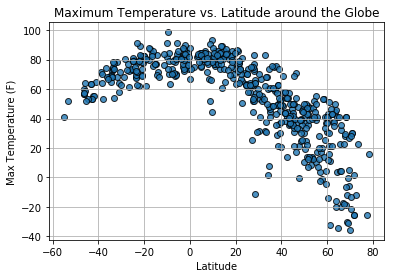

In [15]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. Latitude around the Globe")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/MaxTemp vs. Latitude.png")

# Show plot
plt.show()

#### Humidity versus latitude plot

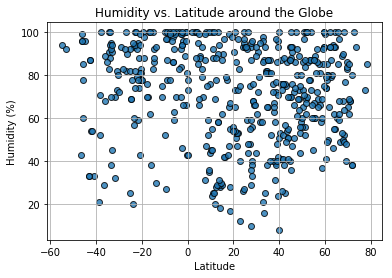

In [14]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude around the Globe")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Humidity vs. Latitude.png")

# Show plot
plt.show()

#### Cloudiness versus latitude plot

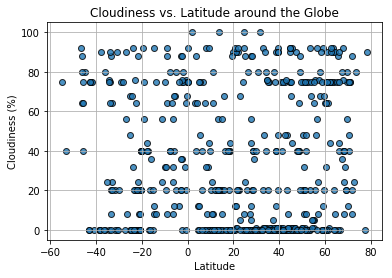

In [19]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude around the Globe")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Cloudiness vs. Latitude.png")

# Show plot
plt.show()

#### Wind speed versus latitude plot

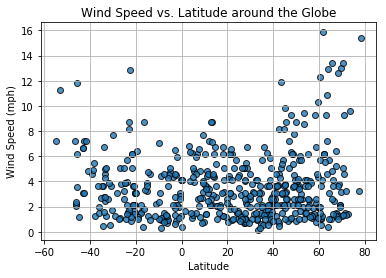

In [17]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude around the Globe")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Wind Speed vs. Latitude.png")

# Show plot
plt.show()

#### Three Conclusions

##### 1. Clearly, temperature goes up as you get closer to the equator. The temperature data bends in an arc, from 30 degrees Fahrenheit at -60 degrees latitude to 85 degrees at the equator to 30 degrees at 80 degrees latitude.

###### 2. Wind Speed and Humidity appear normally distributed, with a low wind speed and a high humidity being the consistent realities for this data set. The global humidity seems to have a median of around 85%, and wind speed seems to be a median of around 1.5-2.5%.

##### 3. Simply looking at cloudiness versus latitude does not tell us much more than that it appears random: cloudiness may have a relationship with other data (like if it is a coastal or non-coastal city, etc.) but there does not seem to be a relationship with latitude.